In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report,recall_score

In [3]:
data = pd.read_csv("input/bank_marketing.csv")

In [4]:
print("Dataset Schema")
print(data.dtypes)
print(data.head())

Dataset Schema
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5

In [5]:
#categorical columns

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns.tolist()

In [6]:
for col_name in categorical_cols:
    distinct_count = data[col_name].nunique()
    print(f"Column: {col_name} -Distinct Count: {distinct_count}")

Column: job -Distinct Count: 12
Column: marital -Distinct Count: 3
Column: education -Distinct Count: 4
Column: default -Distinct Count: 2
Column: housing -Distinct Count: 2
Column: loan -Distinct Count: 2
Column: contact -Distinct Count: 3
Column: month -Distinct Count: 12
Column: poutcome -Distinct Count: 4
Column: deposit -Distinct Count: 2


In [7]:
print("Data summary")
data.describe(include='all')

Data summary


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [8]:
# To check if the data is balanced for the values in target variable
print("Target Variable Distribution:")
data['deposit'].value_counts()

Target Variable Distribution:


deposit
no     5873
yes    5289
Name: count, dtype: int64

In [9]:
# Data cleaning and Transforamtion

def check_unkown_in_columns(data, categorical_columns):
    #count the occurance of 'unknown in the column
    for col in categorical_columns:
        na_count = (data[col] =='unknown').sum()
        if na_count >0:
            print(f"Column : {col} - 'unknown' Occurances:{na_count}")
check_unkown_in_columns(data, categorical_cols)

Column : job - 'unknown' Occurances:70
Column : education - 'unknown' Occurances:497
Column : contact - 'unknown' Occurances:2346
Column : poutcome - 'unknown' Occurances:8326


In [10]:
# Dropping contact poutcome having more unknown values
data = data.drop(columns=['contact', 'poutcome'], axis=1)

In [11]:
data = data.replace('unknown', np.nan)

In [12]:
data = data.dropna()

In [13]:
categorical_cols = ['job', 'education', 'default', 'housing', 'loan']
numeric_cols = ['age', 'balance', 'duration']

categorical_encoder = OneHotEncoder(handle_unknown = 'ignore', drop='first')
numeric_scaler = StandardScaler()

preprocessor = ColumnTransformer([('num', numeric_scaler,numeric_cols), ('cat', categorical_encoder, categorical_cols)])

In [14]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'balance', 'duration']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['job', 'education', 'default', 'housing',
                                  'loan'])])

In [15]:
#convert targe variable to binary 0 or 1
data['deposit'] = LabelEncoder().fit_transform(data['deposit'])

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,1
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,1


In [17]:
x = data.drop('deposit', axis=1)
y= data['deposit']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [19]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', dt)])

In [20]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [21]:
df = pd.DataFrame({'Actuals': y_test, 'Predicted':y_pred})
print(df.head(10).to_string(index=False))

 Actuals  Predicted
       0          0
       0          0
       0          1
       0          0
       1          0
       1          1
       0          0
       1          0
       0          0
       1          1


In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("\n Evaluation Metrics")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


 Evaluation Metrics
Accuracy : 0.76
Precision : 0.74
Recall : 0.78
F1 Score : 0.76


In [23]:
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
print("transformed_feature_names:", transformed_feature_names)
dt_model = pipeline.named_steps['classifier']

dot_data = export_graphviz(dt_model,
                           out_file=None,
                           feature_names = transformed_feature_names,
                           class_names= ['No Deposit', 'Deposit'],
                           filled= True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph.view()

transformed_feature_names: ['num__age' 'num__balance' 'num__duration' 'cat__job_blue-collar'
 'cat__job_entrepreneur' 'cat__job_housemaid' 'cat__job_management'
 'cat__job_retired' 'cat__job_self-employed' 'cat__job_services'
 'cat__job_student' 'cat__job_technician' 'cat__job_unemployed'
 'cat__education_secondary' 'cat__education_tertiary' 'cat__default_yes'
 'cat__housing_yes' 'cat__loan_yes']


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import os
print(os.getcwd())

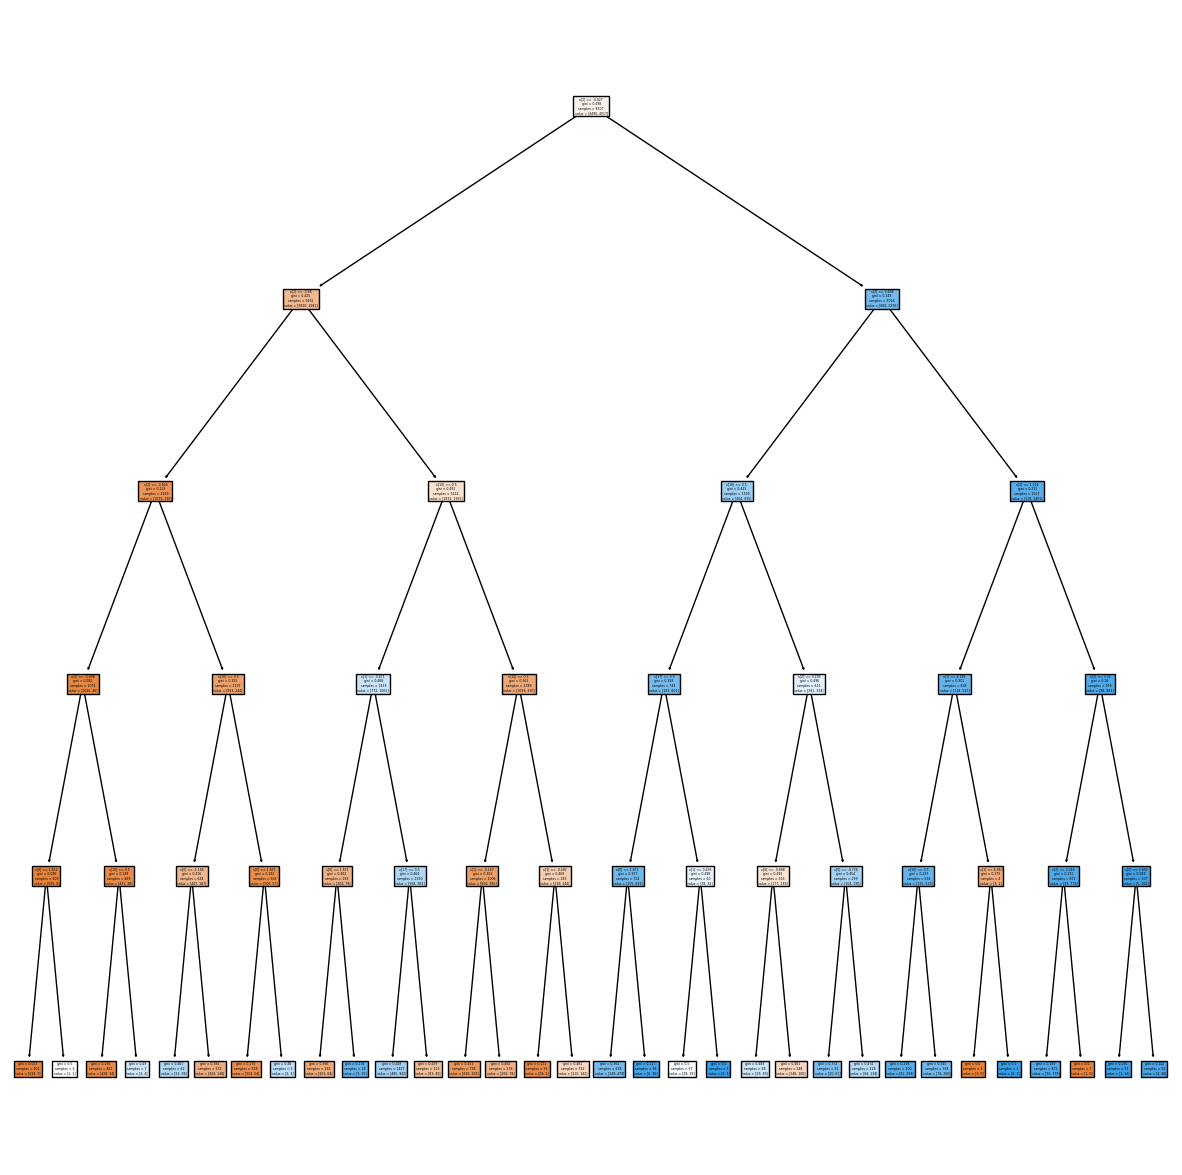

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
tree.plot_tree(dt_model, filled=True)
plt.savefig("decision_tree.png")
plt.show()